In [77]:
import numpy as np
from photutils.datasets import make_4gaussians_image
from photutils.centroids import (centroid_1dg, centroid_2dg,
                                 centroid_com, centroid_quadratic)
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.visualization import simple_norm

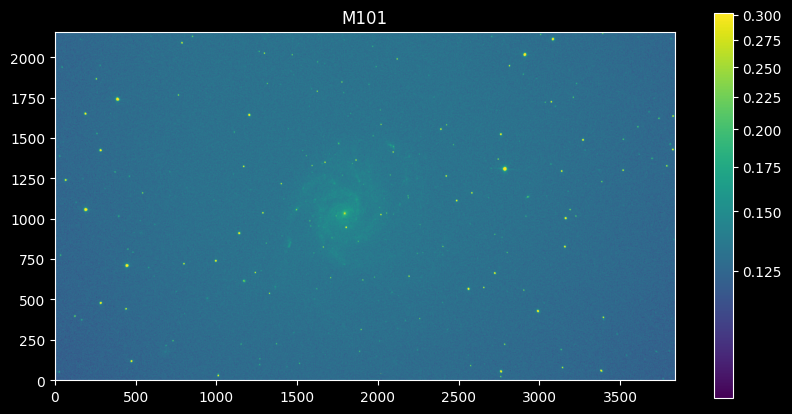

In [183]:
file_name = '../reduced_lights/pp_r01.fit'

data = fits.getdata(file_name)

norm = simple_norm(data, stretch='sqrt', percent=99.9)
plt.style.use('dark_background')
plt.figure(figsize=(10, 5))
plt.imshow(data, norm=norm, origin='lower')
plt.colorbar()
plt.title('M101')
plt.show()

In [184]:
data -= np.median(data[0:30, 100:250])

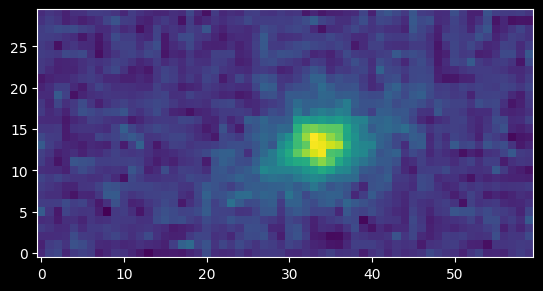

In [185]:
data = data[1120:1150, 2890:2950]
plt.imshow(data, origin='lower')

In [186]:
x1, y1 = centroid_com(data)
print(np.array((x1, y1)))

[31.20002667 13.96052626]


In [187]:
x2, y2 = centroid_quadratic(data)
print(np.array((x2, y2)))  

[33.49134631 13.03413329]


In [188]:
x3, y3 = centroid_1dg(data)
print(np.array((x3, y3)))  

[33.27741212 13.17059606]


In [189]:
x4, y4 = centroid_2dg(data)
print(np.array((x4, y4)))  

[33.64746802 12.89828143]


In [190]:
xycen1 = centroid_com(data)
xycen2 = centroid_quadratic(data)
xycen3 = centroid_1dg(data)
xycen4 = centroid_2dg(data)
xycens = [xycen1, xycen2, xycen3, xycen4]

(0.0, 29.0)

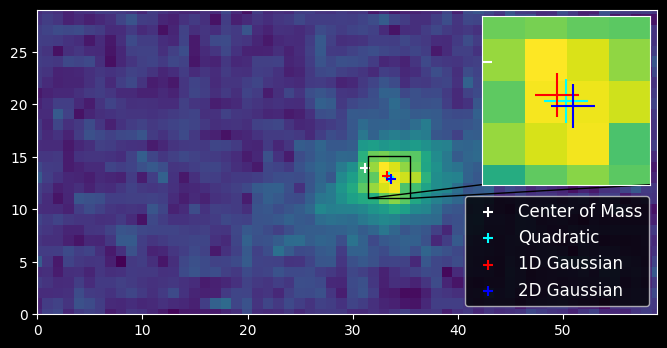

In [191]:
from mpl_toolkits.axes_grid1.inset_locator import (mark_inset,
                                                   zoomed_inset_axes)

xycens = [xycen1, xycen2, xycen3, xycen4]
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.imshow(data, origin='lower', interpolation='nearest')
marker = '+'
ms = 60
colors = ('white', 'cyan', 'red', 'blue')
labels = ('Center of Mass', 'Quadratic', '1D Gaussian', '2D Gaussian')
for xycen, color, label in zip(xycens, colors, labels):
    ax.scatter(*xycen, color=color, marker=marker, s=ms, label=label)

ax.legend(loc='lower right', fontsize=12)

ax2 = zoomed_inset_axes(ax, zoom=4, loc=1)
ax2.imshow(data, origin='lower',
           interpolation='nearest')
ms = 1000
for xycen, color in zip(xycens, colors):
    ax2.scatter(*xycen, color=color, marker=marker, s=ms)
ax2.set_xlim(x2-2,x2+2)
ax2.set_ylim(y2-2, y2+2)
mark_inset(ax, ax2, loc1=3, loc2=4, fc='none', ec='black')
ax2.axes.get_xaxis().set_visible(False)
ax2.axes.get_yaxis().set_visible(False)
ax.set_xlim(0, data.shape[1] - 1)
ax.set_ylim(0, data.shape[0] - 1)